## 1. Create a time series of the plot of the data provided.

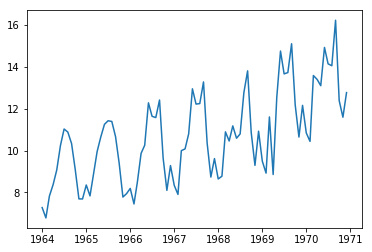

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# data provided
data = pd.read_excel("Project1_DataSet.xlsx")
# time series of the plot of the data provided
plt.plot(data['Month'],data['Miles, in Millions'])

## 2. Compute the autocorrelation function and display it in a plot. What is the seasonal period?
(5 pts)

The seasonal period is 12 based on the autocorrelation of the data.

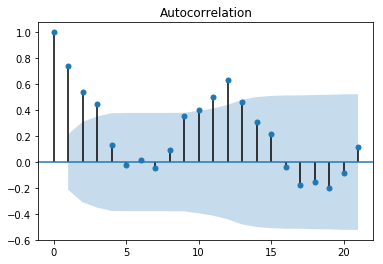

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
# autocorrelation function
plot_acf(data['Miles, in Millions'], lags = 21)
plt.show()

## 3. Compute a moving average for the data and overlay on the original time-series plot. What is a suitable choice for the moving average window length? Why? (5 pts)

The suitable choice for the moving average window length is 12 because it has to capture the moving average of the seasonal cycle. 

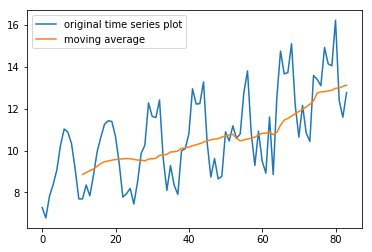

In [4]:
plt.plot(data['Miles, in Millions'], label = "original time series plot")
plt.plot(data['Miles, in Millions'].rolling(12).mean(), label = "moving average")
plt.legend()

## 4. Based on Q3, describe the trend line. What does it indicate, i.e. is it increasing/decreasing?
(5 pts)

Based on Q3, it shows an overall increasing trend. 

## 5. Compute the first difference of the data and plot the ACF and PACF for the differenced data. What are the significant lags based on the ACF and PACF? (5 pts)

The significant lags of ACF are 3,4,5,7,9,12. 12 is the most significant lag among all.

The significant lags of PACF are 3,4,5,7,9,12. 12 is the most significant lag among all.

In [6]:
import numpy as np
# first difference
first_diff = data['Miles, in Millions'] - data['Miles, in Millions'].shift(1)
first_diff

0       NaN
1    -0.494
2     1.044
3     0.552
4     0.698
5     1.179
6     0.782
7    -0.148
8    -0.549
9    -1.224
10   -1.424
11   -0.003
12    0.668
13   -0.521
14    1.000
15    1.119
16    0.690
17    0.615
18    0.171
19   -0.033
20   -0.726
21   -1.269
22   -1.621
23    0.158
24    0.253
25   -0.742
26    1.040
27    1.380
28    0.388
29    2.030
      ...  
54    0.206
55    1.976
56    1.042
57   -2.955
58   -1.567
59    1.635
60   -1.434
61   -0.572
62    2.688
63   -2.755
64    3.685
65    2.222
66   -1.092
67    0.064
68    1.379
69   -2.925
70   -1.540
71    1.516
72   -1.321
73   -0.404
74    3.153
75   -0.187
76   -0.299
77    1.830
78   -0.786
79   -0.090
80    2.177
81   -3.845
82   -0.795
83    1.178
Name: Miles, in Millions, Length: 84, dtype: float64

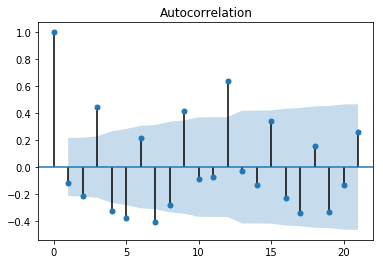

In [7]:
# ACF for the differenced data
plot_acf(first_diff[1:], lags = 21)
plt.show()

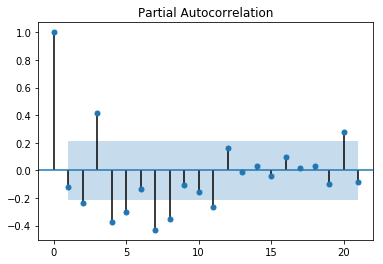

In [8]:
# PACF for the differenced data
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(first_diff[1:], method = "ywmle", lags = 21)
plt.show()

## 6. Using the output from Q5 above, perform a first seasonal difference with the seasonal period you identified in Q2, and plot the ACF and PACF again. What are the significant lags based on the ACF and PACF? (5 pts)

The significant lag for ACF is 1,12. 12 is the most significant lag among lags.

The significant lags for PACF is also 1,9,11,12. 12 is the most significant lag among lags.

In [9]:
seasonal_diff = data['Miles, in Millions'] - data['Miles, in Millions'].shift(12)

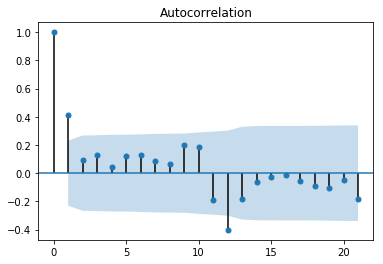

In [10]:
# ACF of seasonal difference 
plot_acf(seasonal_diff[12:], lags = 21)
plt.show()

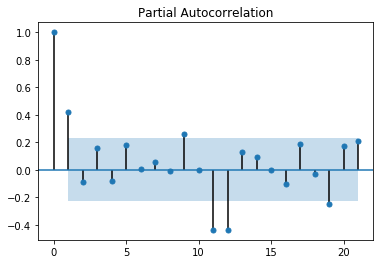

In [11]:
# PACF of seasonal difference
plot_pacf(seasonal_diff[12:], lags = 21)
plt.show()

## 7. Develop a suitable SARIMA model that can be applied on the time series. Use the first 6 years of data only to develop the model. (Hint: The results from Q4-Q6 above should provide you good insight into the range of suitable parameters to consider) (20 pts)

#### a. To develop the model, vary the model parameters for the non-seasonal (p,d,q) and seasonal components (P,D,Q) and calculate the output for each combination of parameters.

In [12]:
import statsmodels.api as sm
for p in (0,1,2,3):
    for q in (0,1,2,3):
        for P in (0,1,2,3):
            for Q in (0,1,2,3):
                try:
                    model=sm.tsa.statespace.SARIMAX(data['Miles, in Millions'].head(72),
                          order=(p, 1, q), seasonal_order=(P, 1, Q, 12),
                          enforce_stationarity=False, enforce_invertibility=False)
                    model_fit = model.fit()
                    AIC  = model_fit.aic
                    print("SARIMA(",p,", 1, ",q,")X(",P,", 1, ",Q,", 12) - AIC:",AIC) 
                except:
                    continue

/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


SARIMA( 0 , 1,  0 )X( 0 , 1,  0 , 12) - AIC: 165.0979551393183
SARIMA( 0 , 1,  0 )X( 0 , 1,  1 , 12) - AIC: 139.57626841155098
SARIMA( 0 , 1,  0 )X( 1 , 1,  0 , 12) - AIC: 140.96796570120188
SARIMA( 0 , 1,  0 )X( 1 , 1,  1 , 12) - AIC: 140.9631172998282
SARIMA( 0 , 1,  0 )X( 2 , 1,  0 , 12) - AIC: 110.10228427762581
SARIMA( 0 , 1,  0 )X( 2 , 1,  1 , 12) - AIC: 111.79619537077888
SARIMA( 0 , 1,  0 )X( 3 , 1,  0 , 12) - AIC: 81.83049863821921
SARIMA( 0 , 1,  0 )X( 3 , 1,  1 , 12) - AIC: 82.61539988724523
SARIMA( 0 , 1,  1 )X( 0 , 1,  0 , 12) - AIC: 156.43899095315967
SARIMA( 0 , 1,  1 )X( 0 , 1,  1 , 12) - AIC: 123.73001107563226
SARIMA( 0 , 1,  1 )X( 1 , 1,  0 , 12) - AIC: 127.0631067380299
SARIMA( 0 , 1,  1 )X( 1 , 1,  1 , 12) - AIC: 124.97436870161873
SARIMA( 0 , 1,  1 )X( 2 , 1,  0 , 12) - AIC: 102.81137840067416
SARIMA( 0 , 1,  1 )X( 2 , 1,  1 , 12) - AIC: 104.27445645871553
SARIMA( 0 , 1,  1 )X( 3 , 1,  0 , 12) - AIC: 78.37560452340162
SARIMA( 0 , 1,  1 )X( 3 , 1,  1 , 12) - AIC: 7

/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 0 , 1,  3 )X( 2 , 1,  1 , 12) - AIC: 104.59081069403828
SARIMA( 0 , 1,  3 )X( 3 , 1,  0 , 12) - AIC: 81.16690609059607
SARIMA( 0 , 1,  3 )X( 3 , 1,  1 , 12) - AIC: 81.3816256557712
SARIMA( 1 , 1,  0 )X( 0 , 1,  0 , 12) - AIC: 165.39195100631085
SARIMA( 1 , 1,  0 )X( 0 , 1,  1 , 12) - AIC: 137.77244145378262
SARIMA( 1 , 1,  0 )X( 1 , 1,  0 , 12) - AIC: 136.30313228511704
SARIMA( 1 , 1,  0 )X( 1 , 1,  1 , 12) - AIC: 138.20472090133177
SARIMA( 1 , 1,  0 )X( 2 , 1,  0 , 12) - AIC: 107.80461039280658
SARIMA( 1 , 1,  0 )X( 2 , 1,  1 , 12) - AIC: 108.78478249295769
SARIMA( 1 , 1,  0 )X( 3 , 1,  0 , 12) - AIC: 78.72952889948041
SARIMA( 1 , 1,  0 )X( 3 , 1,  1 , 12) - AIC: 80.0462769535824
SARIMA( 1 , 1,  1 )X( 0 , 1,  0 , 12) - AIC: 151.41146570162414
SARIMA( 1 , 1,  1 )X( 0 , 1,  1 , 12) - AIC: 124.28979171428789
SARIMA( 1 , 1,  1 )X( 1 , 1,  0 , 12) - AIC: 125.58833299493044
SARIMA( 1 , 1,  1 )X( 1 , 1,  1 , 12) - AIC: 125.77815198288269
SARIMA( 1 , 1,  1 )X( 2 , 1,  0 , 12) - AIC: 1

/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 1 , 1,  2 )X( 2 , 1,  1 , 12) - AIC: 102.92820724021738
SARIMA( 1 , 1,  2 )X( 3 , 1,  0 , 12) - AIC: 78.53904341613209
SARIMA( 1 , 1,  2 )X( 3 , 1,  1 , 12) - AIC: 78.7257503148355
SARIMA( 1 , 1,  3 )X( 0 , 1,  0 , 12) - AIC: 146.64963430536704
SARIMA( 1 , 1,  3 )X( 0 , 1,  1 , 12) - AIC: 121.7846647755557
SARIMA( 1 , 1,  3 )X( 1 , 1,  0 , 12) - AIC: 127.14999869608438
SARIMA( 1 , 1,  3 )X( 1 , 1,  1 , 12) - AIC: 123.66161250414487


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 1 , 1,  3 )X( 2 , 1,  0 , 12) - AIC: 102.8951535269036


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 1 , 1,  3 )X( 2 , 1,  1 , 12) - AIC: 105.02593001971611
SARIMA( 1 , 1,  3 )X( 3 , 1,  0 , 12) - AIC: 80.45475211935167
SARIMA( 1 , 1,  3 )X( 3 , 1,  1 , 12) - AIC: 80.46154404624934
SARIMA( 2 , 1,  0 )X( 0 , 1,  0 , 12) - AIC: 154.02010431480915
SARIMA( 2 , 1,  0 )X( 0 , 1,  1 , 12) - AIC: 129.16001895328495
SARIMA( 2 , 1,  0 )X( 1 , 1,  0 , 12) - AIC: 127.5055010075931
SARIMA( 2 , 1,  0 )X( 1 , 1,  1 , 12) - AIC: 128.984530122085
SARIMA( 2 , 1,  0 )X( 2 , 1,  0 , 12) - AIC: 102.15032404661804
SARIMA( 2 , 1,  0 )X( 2 , 1,  1 , 12) - AIC: 103.8491868891054
SARIMA( 2 , 1,  0 )X( 3 , 1,  0 , 12) - AIC: 76.47470973534053
SARIMA( 2 , 1,  0 )X( 3 , 1,  1 , 12) - AIC: 76.7206577771706
SARIMA( 2 , 1,  1 )X( 0 , 1,  0 , 12) - AIC: 152.05476525838938
SARIMA( 2 , 1,  1 )X( 0 , 1,  1 , 12) - AIC: 125.41852812753062
SARIMA( 2 , 1,  1 )X( 1 , 1,  0 , 12) - AIC: 125.32016667582957
SARIMA( 2 , 1,  1 )X( 1 , 1,  1 , 12) - AIC: 127.32016158747602
SARIMA( 2 , 1,  1 )X( 2 , 1,  0 , 12) - AIC: 99.4

/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 2 , 1,  3 )X( 2 , 1,  0 , 12) - AIC: 99.98846097712875


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 2 , 1,  3 )X( 2 , 1,  1 , 12) - AIC: 104.45295522756793
SARIMA( 2 , 1,  3 )X( 3 , 1,  0 , 12) - AIC: 78.57120399427122
SARIMA( 2 , 1,  3 )X( 3 , 1,  1 , 12) - AIC: 78.1935007340201
SARIMA( 3 , 1,  0 )X( 0 , 1,  0 , 12) - AIC: 153.99266203927255
SARIMA( 3 , 1,  0 )X( 0 , 1,  1 , 12) - AIC: 131.12295614388194
SARIMA( 3 , 1,  0 )X( 1 , 1,  0 , 12) - AIC: 127.49984018554724
SARIMA( 3 , 1,  0 )X( 1 , 1,  1 , 12) - AIC: 129.04508938301728
SARIMA( 3 , 1,  0 )X( 2 , 1,  0 , 12) - AIC: 101.64643838119196
SARIMA( 3 , 1,  0 )X( 2 , 1,  1 , 12) - AIC: 103.036053367689
SARIMA( 3 , 1,  0 )X( 3 , 1,  0 , 12) - AIC: 74.42188808973376
SARIMA( 3 , 1,  0 )X( 3 , 1,  1 , 12) - AIC: 72.72470848576157
SARIMA( 3 , 1,  1 )X( 0 , 1,  0 , 12) - AIC: 150.08148334627487
SARIMA( 3 , 1,  1 )X( 0 , 1,  1 , 12) - AIC: 126.39989367024589
SARIMA( 3 , 1,  1 )X( 1 , 1,  0 , 12) - AIC: 124.32650149071198
SARIMA( 3 , 1,  1 )X( 1 , 1,  1 , 12) - AIC: 126.32523396163539
SARIMA( 3 , 1,  1 )X( 2 , 1,  0 , 12) - AIC: 98

/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  2 )X( 2 , 1,  1 , 12) - AIC: 102.2649445285707
SARIMA( 3 , 1,  2 )X( 3 , 1,  0 , 12) - AIC: 73.8077025412056


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  2 )X( 3 , 1,  1 , 12) - AIC: 71.72053028944318
SARIMA( 3 , 1,  3 )X( 0 , 1,  0 , 12) - AIC: 147.46217775865813
SARIMA( 3 , 1,  3 )X( 0 , 1,  1 , 12) - AIC: 120.92720864818183


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  3 )X( 1 , 1,  0 , 12) - AIC: 120.95915892072838


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  3 )X( 1 , 1,  1 , 12) - AIC: 122.94939541883436


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  3 )X( 2 , 1,  0 , 12) - AIC: 101.96940743237263


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA( 3 , 1,  3 )X( 2 , 1,  1 , 12) - AIC: 104.00430427246519
SARIMA( 3 , 1,  3 )X( 3 , 1,  0 , 12) - AIC: 74.10270246764571
SARIMA( 3 , 1,  3 )X( 3 , 1,  1 , 12) - AIC: 76.10644988087785


/Users/jungmin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### b. Use an evaluation criteria such as AIC or sum squared error or mean squared error to determine the best choice of parameters (p,d,q,P,D,Q). Note: AIC is a metric that is readily output by the ARIMA model. When comparing two models, the model with the lower AIC value is better.

This SARMIA model with the order (p,d,q) = (3, 1, 1) and seasonal_order (P, D, Q) = (3, 1, 1) had the lowest AIC value, so it is the best choice of parameters.

In [13]:
# SARIMA model
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['Miles, in Millions'].head(72),
                                  order=(3, 1, 1),
                                  seasonal_order=(3, 1, 1, 12),
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)
model_fit = model.fit()
# AIC of the (p,d,q) = (3, 1, 1), seasonal_order (P, D, Q) = (3, 1, 1)
model_fit.aic

70.0610540508186

## 8. Use the model parameters determined in Q7 above to forecast for the 7th year. Compare the forecast with actual values. Provide your own insight on how you believe the forecast can be improved? (10 pts)

I believe that the forecast can be improved by using more past data to develop the model and try to use cross validation so that the performance of all iterations can be combined to tune the model. 

In [14]:
# forecast for the 7th year
pred = model_fit.get_prediction(start = 72, end = 83)
forecasted = pred.predicted_mean
forecasted

72    10.201425
73    10.692849
74    12.534565
75    11.584190
76    12.871533
77    10.361019
78    11.141635
79    14.293570
80    15.088144
81    12.363653
82    10.828548
83    12.937065
dtype: float64

In [15]:
# actual values of the 7th year
actual = data['Miles, in Millions'][72:84]
actual

72    10.840
73    10.436
74    13.589
75    13.402
76    13.103
77    14.933
78    14.147
79    14.057
80    16.234
81    12.389
82    11.594
83    12.772
Name: Miles, in Millions, dtype: float64

In [16]:
# mean squared error
mse = ((forecasted - actual)**2).mean()
mse

3.071797858169896

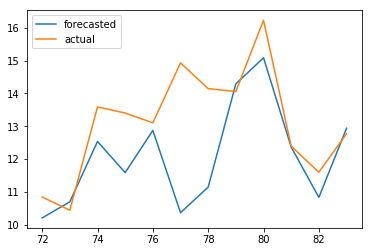

In [17]:
# comparison plot of forecasted and actual data
plt.plot(forecasted, label = "forecasted")
plt.plot(actual, label = "actual")
plt.legend()